## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1,l2,l1_l2

In [13]:

def build_mlp_1(input_shape,output_units=10, num_neurons=[512,256,128],l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


def build_mlp_2(input_shape, output_units=10,num_neurons=[512,256,128],l1_l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
"""Code Here
設定超參數
"""

## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 sampl

50000/50000 [==============================] - 3s 64us/step - loss: 2.4626 - acc: 0.0978 - val_loss: 2.4624 - val_acc: 0.1000
Experiment with Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 76us/step - loss: 2.0244 - acc: 0.2735 - val_loss: 1.8640 - val_acc: 0.3435
Epoch 2/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8039 - acc: 0.3657 - val_loss: 1.7555 - val_acc: 0.3876
Epoch 3/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7203 - acc: 0.3956 - val_loss: 1.6923 - val_acc: 0.3983
Epoch 4/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6632 - acc: 0.4169 - val_loss: 1.6375 - val_acc: 0.4206
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6180 - acc: 0.4299 - val_loss: 1.5999 - val_acc: 0.4373
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5796 - acc: 0.4457 - val_loss: 1.5758 - val_acc: 0.4465
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5469 - acc: 0.4586 - val_loss: 1.5486 - val_acc

50000/50000 [==============================] - 4s 78us/step - loss: 1.8056 - acc: 0.3665 - val_loss: 1.7564 - val_acc: 0.3883
Epoch 3/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7247 - acc: 0.3967 - val_loss: 1.6895 - val_acc: 0.4059
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6675 - acc: 0.4156 - val_loss: 1.6398 - val_acc: 0.4290
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6226 - acc: 0.4309 - val_loss: 1.6110 - val_acc: 0.4402
Epoch 6/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5837 - acc: 0.4454 - val_loss: 1.5696 - val_acc: 0.4522
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5502 - acc: 0.4572 - val_loss: 1.5596 - val_acc: 0.4525
Epoch 8/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.5217 - acc: 0.4687 - val_loss: 1.5284 - val_acc: 0.4635
Epoch 9/50
50000/50000 [============================

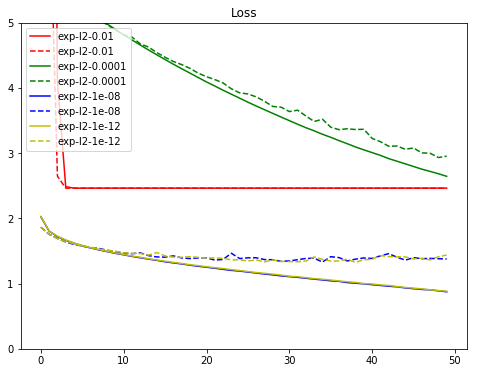

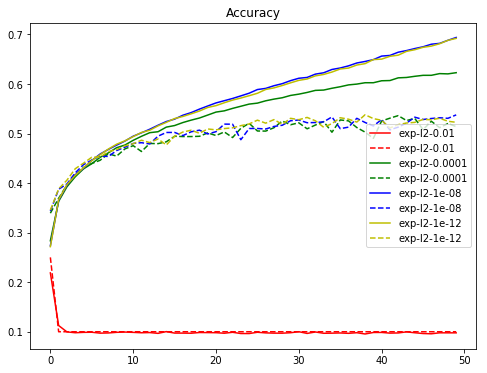

In [15]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 81us/step - loss: 18.7823 - acc: 0.2776 - val_loss: 17.3427 - val_acc: 0.3465
Epoch 2/50
50000/50000 [==============================] - 4s 72us/step - loss: 16.1257 - acc: 0.3595 - val_loss: 14.9675 - val_acc: 0.3749
Epoch 3/50
50000/50000 [==============================] - 4s 70us/step - loss: 13.9433 - acc: 0.3823 - val_loss: 12.9632 - val_acc: 0.3946
Epoch 4/50
50000/50000 [==============================] - 4s 79us/step - loss: 12.0970 - acc: 0.3979 - val_loss: 11.2597 - val_acc: 0.4079
Epoch 5/50
50000/50000 [==============================] - 4s 71us/step - loss: 10.5269 - acc: 0.4045 - val_loss: 9.8193 - val_acc: 0.4077
Epoch 6/50
50000/50000 [==============================] - 4s 71us/step - loss: 9.1901 - acc: 0.4123 - val_loss: 8.5843 - val_acc: 0.4162
Epoch 7/50
50000/50000 [==============================] - 3s 67us/step - loss: 8.0518 - acc: 0.4209 - val_loss: 7.5385 

50000/50000 [==============================] - 3s 68us/step - loss: 13.0079 - acc: 0.3581 - val_loss: 12.1176 - val_acc: 0.3717
Epoch 3/50
50000/50000 [==============================] - 3s 67us/step - loss: 11.3342 - acc: 0.3852 - val_loss: 10.5798 - val_acc: 0.3997
Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 9.9223 - acc: 0.3982 - val_loss: 9.2839 - val_acc: 0.4073
Epoch 5/50
50000/50000 [==============================] - 4s 70us/step - loss: 8.7229 - acc: 0.4103 - val_loss: 8.1919 - val_acc: 0.4049
Epoch 6/50
50000/50000 [==============================] - 3s 69us/step - loss: 7.7008 - acc: 0.4184 - val_loss: 7.2385 - val_acc: 0.4221
Epoch 7/50
50000/50000 [==============================] - 3s 68us/step - loss: 6.8292 - acc: 0.4243 - val_loss: 6.4385 - val_acc: 0.4279
Epoch 8/50
50000/50000 [==============================] - 4s 71us/step - loss: 6.0856 - acc: 0.4304 - val_loss: 5.7514 - val_acc: 0.4314
Epoch 9/50
50000/50000 [========================

50000/50000 [==============================] - 3s 65us/step - loss: 11.3497 - acc: 0.3787 - val_loss: 10.6012 - val_acc: 0.3841
Epoch 4/50
50000/50000 [==============================] - 3s 65us/step - loss: 9.9364 - acc: 0.3921 - val_loss: 9.3045 - val_acc: 0.3960
Epoch 5/50
50000/50000 [==============================] - 3s 67us/step - loss: 8.7344 - acc: 0.4040 - val_loss: 8.1944 - val_acc: 0.4046
Epoch 6/50
50000/50000 [==============================] - 3s 67us/step - loss: 7.7098 - acc: 0.4134 - val_loss: 7.2550 - val_acc: 0.4126
Epoch 7/50
50000/50000 [==============================] - 3s 66us/step - loss: 6.8358 - acc: 0.4202 - val_loss: 6.4390 - val_acc: 0.4282
Epoch 8/50
50000/50000 [==============================] - 3s 66us/step - loss: 6.0909 - acc: 0.4279 - val_loss: 5.7541 - val_acc: 0.4307
Epoch 9/50
50000/50000 [==============================] - 3s 66us/step - loss: 5.4536 - acc: 0.4348 - val_loss: 5.1753 - val_acc: 0.4350
Epoch 10/50
50000/50000 [=========================

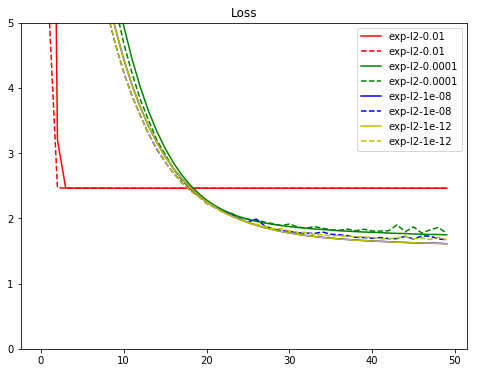

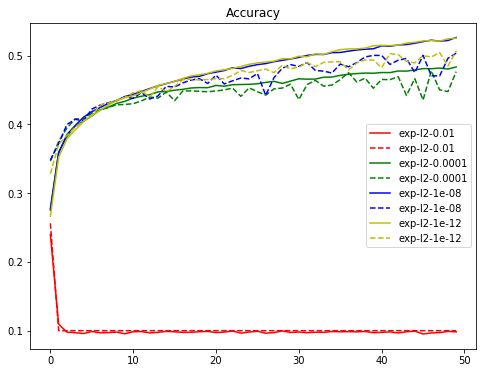

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_2(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()